## Table of Contents:

1. Introduction and Importing Libraries
2. Data Preprocessing and Feature Engineering
3. Model Building- Machine Learning
    a. SVM
    b. Random Forest

4. Hyperparameter Tuning
5. Conclusion and Saving the Model


## 1. Introduction and Importing Libraries

In [4]:

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import xgboost as xgb

In [5]:
df = pd.read_csv('Resources/BBC_News_Summary.csv')
df.head()


,Article,Summary,Category,Article_Length,Summary_Length
0,ad sales boost time warner profitquarterly pro...,timewarner said fourth quarter sales rose to b...,business,403,125
1,dollar gains on greenspan speechthe dollar has...,the dollar has hit its highest level against t...,business,377,159
2,yukos unit buyer faces loan claimthe owners of...,yukos owner menatep group says it will ask ros...,business,261,121
3,high fuel prices hit bas profitsbritish airway...,rod eddington bas chief executive said the res...,business,376,186
4,pernod takeover talk lifts domecqshares in uk ...,pernod has reduced the debt it took on to fund...,business,254,100


In [6]:

# Drop NULL values
df.dropna(inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Check for null values
df.isnull().sum()

Article           0
Summary           0
Category          0
Article_Length    0
Summary_Length    0
dtype: int64

## 2. Data Preprocessing and Feature Engineering

In [7]:

def clean_text(text):

    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    # Remove punctuation
    filtered_sentence = [w for w in filtered_sentence if w.isalpha()]

    # Lemmatize
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered_sentence]

    return " ".join(lemmatized)


df['clean_text'] = df['Article'].apply(clean_text)
df.head()


,Article,Summary,Category,Article_Length,Summary_Length,clean_text
0,ad sales boost time warner profitquarterly pro...,timewarner said fourth quarter sales rose to b...,business,403,125,ad sale boost time warner profitquarterly prof...
1,dollar gains on greenspan speechthe dollar has...,the dollar has hit its highest level against t...,business,377,159,dollar gain greenspan speechthe dollar hit hig...
2,yukos unit buyer faces loan claimthe owners of...,yukos owner menatep group says it will ask ros...,business,261,121,yukos unit buyer face loan claimthe owner emba...
3,high fuel prices hit bas profitsbritish airway...,rod eddington bas chief executive said the res...,business,376,186,high fuel price hit ba profitsbritish airway b...
4,pernod takeover talk lifts domecqshares in uk ...,pernod has reduced the debt it took on to fund...,business,254,100,pernod takeover talk lift domecqshares uk drin...


In [8]:

df = df[['clean_text', 'Category']]

df.head()


,clean_text,Category
0,ad sale boost time warner profitquarterly prof...,business
1,dollar gain greenspan speechthe dollar hit hig...,business
2,yukos unit buyer face loan claimthe owner emba...,business
3,high fuel price hit ba profitsbritish airway b...,business
4,pernod takeover talk lift domecqshares uk drin...,business


In [9]:
df['Category'].value_counts()


sport            504
business         503
politics         403
entertainment    369
tech             346
Name: Category, dtype: int64

In [10]:


# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the text into TF-IDF vectors
X = vectorizer.fit_transform(df['clean_text'])

# Create a dataframe from the TF-IDF vectors
X = pd.DataFrame.sparse.from_spmatrix(X)

# Create the target vector
y = df['Category']


# Split the dataframe into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('Training set shape:', X_train.shape, y_train.shape)
print('Test set shape:', X_test.shape, y_test.shape)


Training set shape: (1593, 5000) (1593,)
Test set shape: (532, 5000) (532,)


In [11]:

# Value counts of Y train
y_train.value_counts()


sport            373
business         369
politics         323
entertainment    273
tech             255
Name: Category, dtype: int64

In [12]:

# Value count in Y-test
y_test.value_counts()


business         134
sport            131
entertainment     96
tech              91
politics          80
Name: Category, dtype: int64

In [13]:

# Get Label names

labels = df['Category'].unique()
print(labels)


['business' 'entertainment' 'politics' 'sport' 'tech']


In [14]:

# import Label Encoder

from sklearn.preprocessing import LabelEncoder

# Encode the labels

le = LabelEncoder()

# Fit the encoder

le.fit(y_train)
le.fit(y_test)

# Transform the labels

y_train = le.transform(y_train)
y_test = le.transform(y_test)

## 3. Model Building- Machine Learning

### a. KNN

In [15]:

# KNN Model
knn_model=KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train,y_train)


# Predict
y_pred=knn_model.predict(X_test)


# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.9323308270676691
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       134
           1       0.99      0.89      0.93        96
           2       0.85      0.95      0.90        80
           3       0.95      1.00      0.97       131
           4       0.91      0.97      0.94        91

    accuracy                           0.93       532
   macro avg       0.93      0.93      0.93       532
weighted avg       0.94      0.93      0.93       532



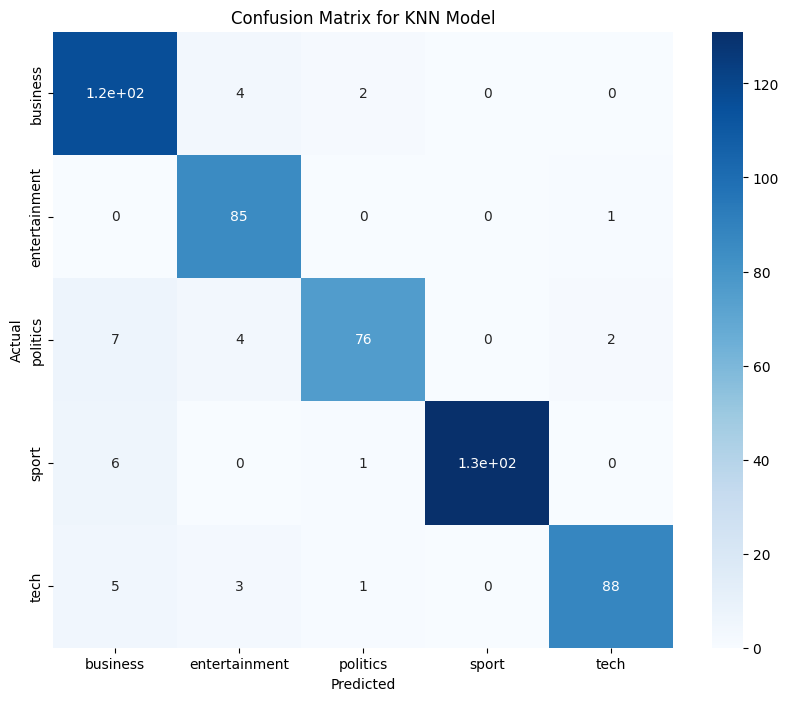

In [16]:

# Confusion matrix

cm = confusion_matrix(y_pred, y_test)

# Plot the confusion matrix

plt.figure(figsize=(10, 8))

# Print value in boxes in format
sns.heatmap(cm, annot=True, xticklabels=labels,
            yticklabels=labels, cmap='Blues')

# Labels

plt.xlabel('Predicted')
plt.ylabel('Actual')

# Title

plt.title('Confusion Matrix for KNN Model')

# Save the plot

plt.savefig('Resources/Confusion_Matrix_KNN.png',
            dpi=300, bbox_inches='tight')


### b. Random Forest Classifier

In [17]:

# Create the model

rf_model = RandomForestClassifier()

# Fit the model

rf_model.fit(X_train, y_train)


# Make predictions
y_pred = rf_model.predict(X_test)


# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.9680451127819549
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       134
           1       0.98      0.95      0.96        96
           2       0.95      0.93      0.94        80
           3       0.98      1.00      0.99       131
           4       0.99      0.98      0.98        91

    accuracy                           0.97       532
   macro avg       0.97      0.96      0.97       532
weighted avg       0.97      0.97      0.97       532



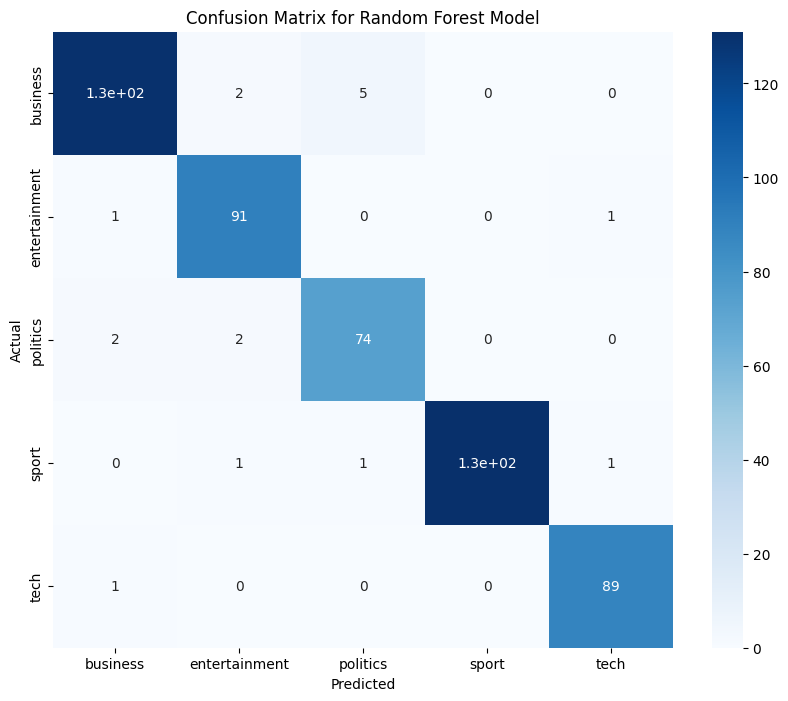

In [18]:

# Confusion matrix

cm = confusion_matrix(y_pred, y_test)

# Plot the confusion matrix

plt.figure(figsize=(10, 8))

# Print value in boxes in format
sns.heatmap(cm, annot=True, xticklabels=labels,
            yticklabels=labels, cmap='Blues')

# Labels

plt.xlabel('Predicted')
plt.ylabel('Actual')

# Title

plt.title('Confusion Matrix for Random Forest Model')

# Save the plot

plt.savefig('Resources/Confusion_Matrix_Random_Forest.png',
            dpi=300, bbox_inches='tight')


### c. X-Gradient Boosting

In [19]:

# Create the model

xgb_model = xgb.XGBClassifier()

# Fit the model

xgb_model.fit(X_train, y_train)


# Make predictions
y_pred = xgb_model.predict(X_test)


# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       134
           1       0.97      0.92      0.94        96
           2       0.90      0.91      0.91        80
           3       0.98      1.00      0.99       131
           4       0.94      0.98      0.96        91

    accuracy                           0.95       532
   macro avg       0.94      0.95      0.94       532
weighted avg       0.95      0.95      0.95       532



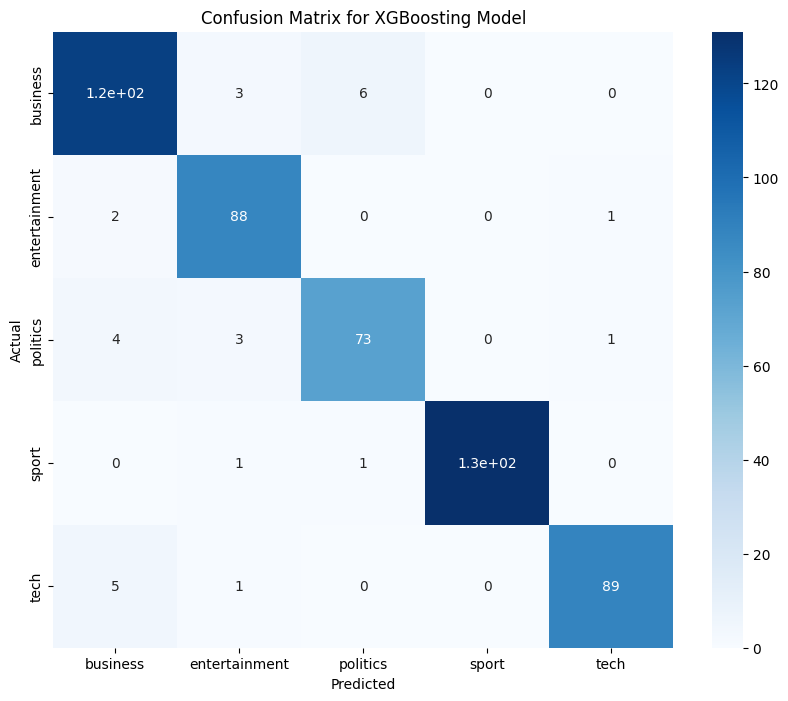

In [20]:

# Confusion matrix

cm = confusion_matrix(y_pred, y_test)

# Plot the confusion matrix

plt.figure(figsize=(10, 8))

# Print value in boxes in format
sns.heatmap(cm, annot=True, xticklabels=labels,
            yticklabels=labels, cmap='Blues')

# Labels

plt.xlabel('Predicted')
plt.ylabel('Actual')

# Title

plt.title('Confusion Matrix for XGBoosting Model')

# Save the plot

plt.savefig('Resources/Confusion_Matrix_XGBoost.png',
            dpi=300, bbox_inches='tight')




## 4. Hyperparameter Tuning- Random Forest

In [21]:

# Parameter grid for grid search

param_grid = {'n_estimators': [100, 200, 300],
                'max_depth': [None, 1, 3, 5],
                'criterion': ['gini', 'entropy']}

# Create the model

rf_model = RandomForestClassifier()

# Create the grid search object

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                            cv=5, verbose=2, n_jobs=-1)

# Fit the grid search object to the data

grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [22]:


# Get the best parameters

print(grid_search.best_params_)


# Get the best estimator

best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)


# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))



{'criterion': 'gini', 'max_depth': None, 'n_estimators': 300}
Accuracy: 0.9642857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       134
           1       0.99      0.92      0.95        96
           2       0.91      0.94      0.93        80
           3       0.98      1.00      0.99       131
           4       0.99      0.99      0.99        91

    accuracy                           0.96       532
   macro avg       0.96      0.96      0.96       532
weighted avg       0.96      0.96      0.96       532



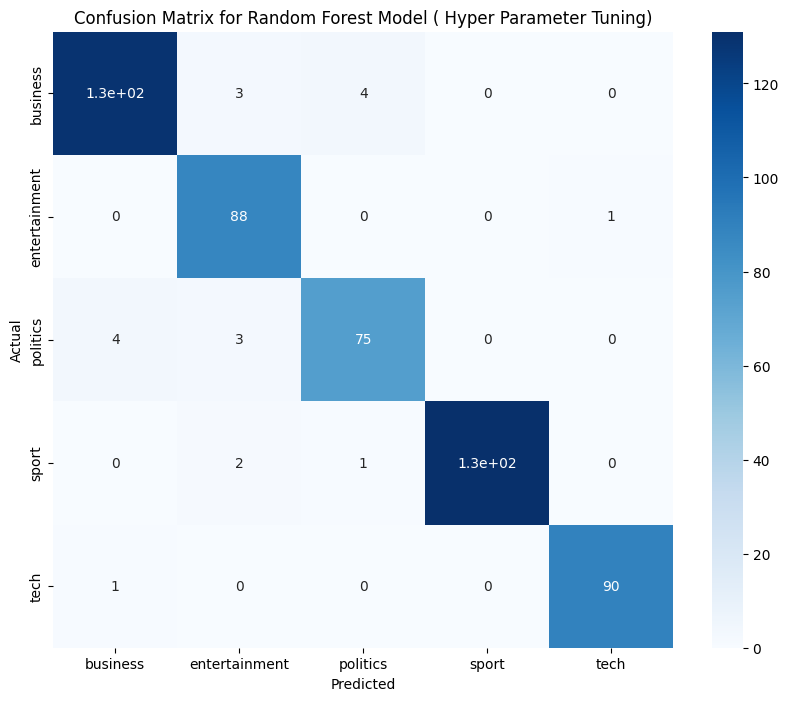

In [23]:

# Confusion matrix

cm = confusion_matrix(y_pred, y_test)

# Plot the confusion matrix

plt.figure(figsize=(10, 8))

# Print value in boxes in format
sns.heatmap(cm, annot=True, xticklabels=labels,
            yticklabels=labels, cmap='Blues')

# Labels

plt.xlabel('Predicted')
plt.ylabel('Actual')

# Title

plt.title('Confusion Matrix for Random Forest Model ( Hyper Parameter Tuning)')

# Save the plot

plt.savefig('Resources/Confusion_Matrix_Random_Forest_Grid_Search.png',
            dpi=300, bbox_inches='tight')




## 5. Saving

In [ ]:

import pickle

# Save the model
with open('Resources/Random_Forest_Model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


# Save the model
with open('Resources/KNN_Model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)


# Save the model
with open('Resources/XGBoost_Model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)


# Save the grid search object

with open('Resources/Grid_Search_Random_Search.pkl', 'wb') as f:
    pickle.dump(grid_search, f)


# Save the vectorizer
with open('Resources/TFIDF_Vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


# Save the encoder
with open('Resources/Label_Encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


# Save the labels
with open('Resources/Labels.pkl', 'wb') as f:
    pickle.dump(labels, f)
